In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('D:/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Data Dictionary
The Dataset has 303 rows and 14 columns. Column descriptions are as below:


Age : Age of the patient
Sex : Sex of the patient (1:male, 0:female)
exang: exercise induced angina (1 = yes; 0 = no) means is there chest pain after exercise?
ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

oldpeak - ST depression induced by exercise relative to rest

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

slp: slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

thalach : maximum heart rate achieved

thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

target : 0= less chance of heart attack 1= more chance of heart attack

I will be renaming the features for the sake of ease in understanding while EDA.

In [3]:
col_dict = {
        'age':'Age',
        'sex':'Sex',
        'cp':'ChestPainType',
        'trtbps':'RestBloodPressure',
        'chol':'Cholesterol', 
        'fbs':'FastingBloodSugar',
        'restecg':'RestECG',
        'thalachh':'MaxHeartRate',
        'exng':'ExerciseAngina',
        'oldpeak':'STDepbyExercise',
        'slp':'Slop',
        'caa':'MajorVessels',
        'thall':'DefectType',
        'output':'output'
    }

In [4]:
old_col_names = list(df.columns)
new_col_names = [col_dict[i] for i in old_col_names]
df.columns = new_col_names

In [5]:
df

,Age,Sex,ChestPainType,RestBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRate,ExerciseAngina,STDepbyExercise,Slop,MajorVessels,DefectType,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
col_dict

{'age': 'Age',
 'sex': 'Sex',
 'cp': 'ChestPainType',
 'trtbps': 'RestBloodPressure',
 'chol': 'Cholesterol',
 'fbs': 'FastingBloodSugar',
 'restecg': 'RestECG',
 'thalachh': 'MaxHeartRate',
 'exng': 'ExerciseAngina',
 'oldpeak': 'STDepbyExercise',
 'slp': 'Slop',
 'caa': 'MajorVessels',
 'thall': 'DefectType',
 'output': 'output'}

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                303 non-null    int64  
 1   Sex                303 non-null    int64  
 2   ChestPainType      303 non-null    int64  
 3   RestBloodPressure  303 non-null    int64  
 4   Cholesterol        303 non-null    int64  
 5   FastingBloodSugar  303 non-null    int64  
 6   RestECG            303 non-null    int64  
 7   MaxHeartRate       303 non-null    int64  
 8   ExerciseAngina     303 non-null    int64  
 9   STDepbyExercise    303 non-null    float64
 10  Slop               303 non-null    int64  
 11  MajorVessels       303 non-null    int64  
 12  DefectType         303 non-null    int64  
 13  output             303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The data has non-null values for all rows or all columns and except column 'STDepbyExercise' every other column is int64 type. 'STDepbyExercise' is float64 type.



So we must check how values are in 'STDepbyExercise'



In [8]:
df.STDepbyExercise.sample(10)


173    3.2
272    1.0
53     0.6
210    0.4
26     1.6
34     1.4
110    0.0
224    2.8
189    0.0
48     0.0
Name: STDepbyExercise, dtype: float64

In [9]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
ChestPainType,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
RestBloodPressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
FastingBloodSugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestECG,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
MaxHeartRate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
ExerciseAngina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
STDepbyExercise,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


We want to focus on these values but only for numerical columns and not for the categorical ones.



First lets check how many unique non null values we have per feature



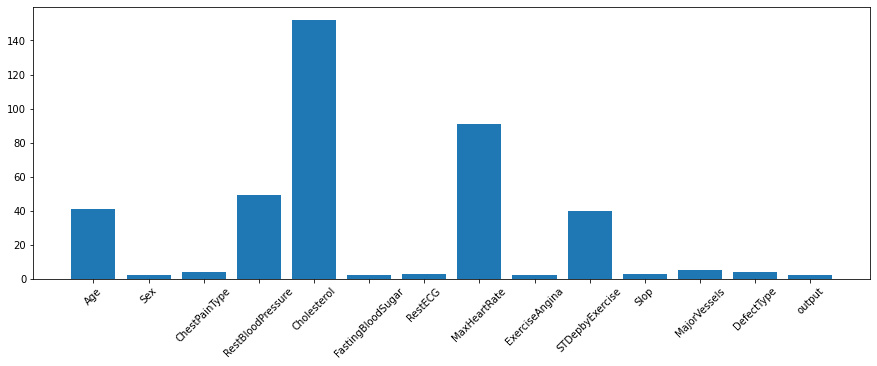

In [12]:
unique_values = [(i, df[i].nunique()) for i in df.columns]
plt.figure(figsize=(15,5))
plt.bar(*zip(*unique_values))
plt.xticks(rotation=45)
plt.show()

Let's separate the numerical and categorical columns



In [13]:
numerical_columns = ('Age RestBloodPressure Cholesterol MaxHeartRate STDepbyExercise').split()
categorical_columns = ('Sex ChestPainType FastingBloodSugar RestECG ExerciseAngina \
                         Slop MajorVessels DefectType').split()
target_column = 'output'
print(numerical_columns)
print(categorical_columns)
print(target_column)

['Age', 'RestBloodPressure', 'Cholesterol', 'MaxHeartRate', 'STDepbyExercise']
['Sex', 'ChestPainType', 'FastingBloodSugar', 'RestECG', 'ExerciseAngina', 'Slop', 'MajorVessels', 'DefectType']
output


Now let's look at descriptions of numerical columns



In [14]:
col_details = pd.DataFrame(columns=['ColName', 'Mean', 'Median', 'Mode', 'Min', 'Max'])
for i in numerical_columns:
    col_details.loc[len(col_details)] = [i, df[i].mean(), df[i].median(), df[i].mode(), df[i].min(), df[i].max()]
col_details

,ColName,Mean,Median,Mode,Min,Max
0,Age,54.366337,55.0,0 58 dtype: int64,29,77
1,RestBloodPressure,131.623762,130.0,0 120 dtype: int64,94,200
2,Cholesterol,246.264026,240.0,0 197 1 204 2 234 dtype: int64,126,564
3,MaxHeartRate,149.646865,153.0,0 162 dtype: int64,71,202
4,STDepbyExercise,1.039604,0.8,0 0.0 dtype: float64,0,6.2


The data has people from age 29 to 77, mean age 54. People in survey have avg Blood Pressure 131, avg Cholesterol 246, Avg Heart Rate 149

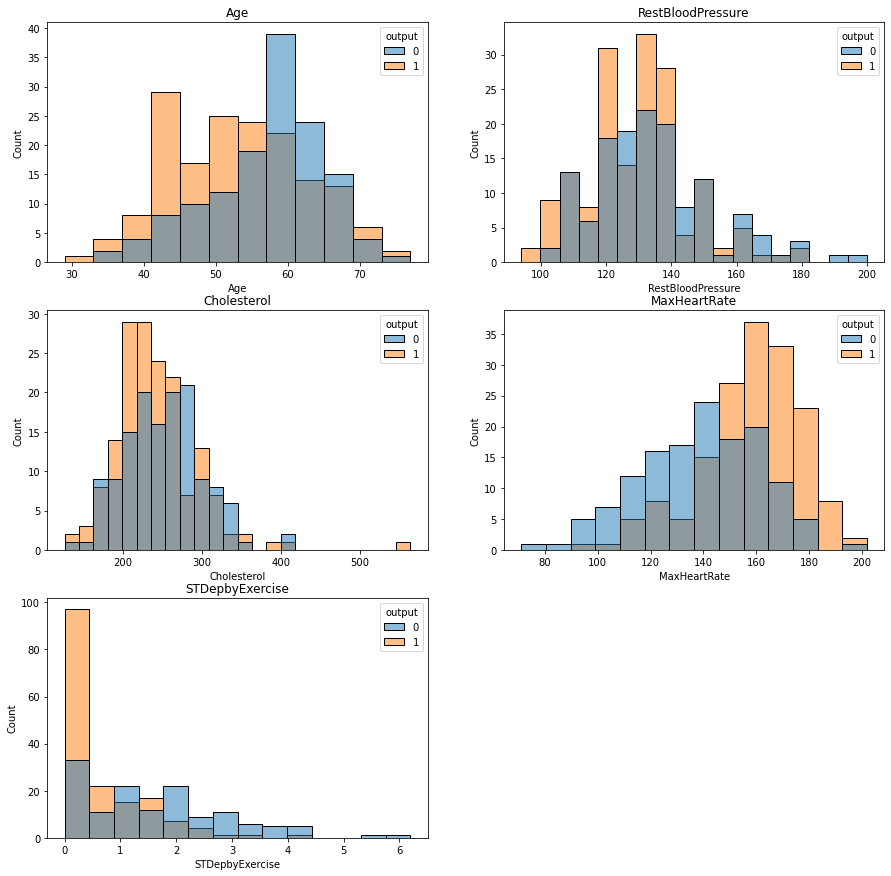

In [15]:
rows, cols = 3, 2
plt.figure(figsize=(15,15))
plt.tight_layout()
counter = 1
for i in numerical_columns:
    if counter<=9:
        plt.subplot(rows, cols, counter)
        sns.histplot(data = df, x= i, hue='output')
        plt.title(i)
        counter+=1

The distributions look overlapping. However
people with max heart rate above 150 were mostly positive and those with less than 150 were mostly negative.
most people with STDepExercise 0 were positive.

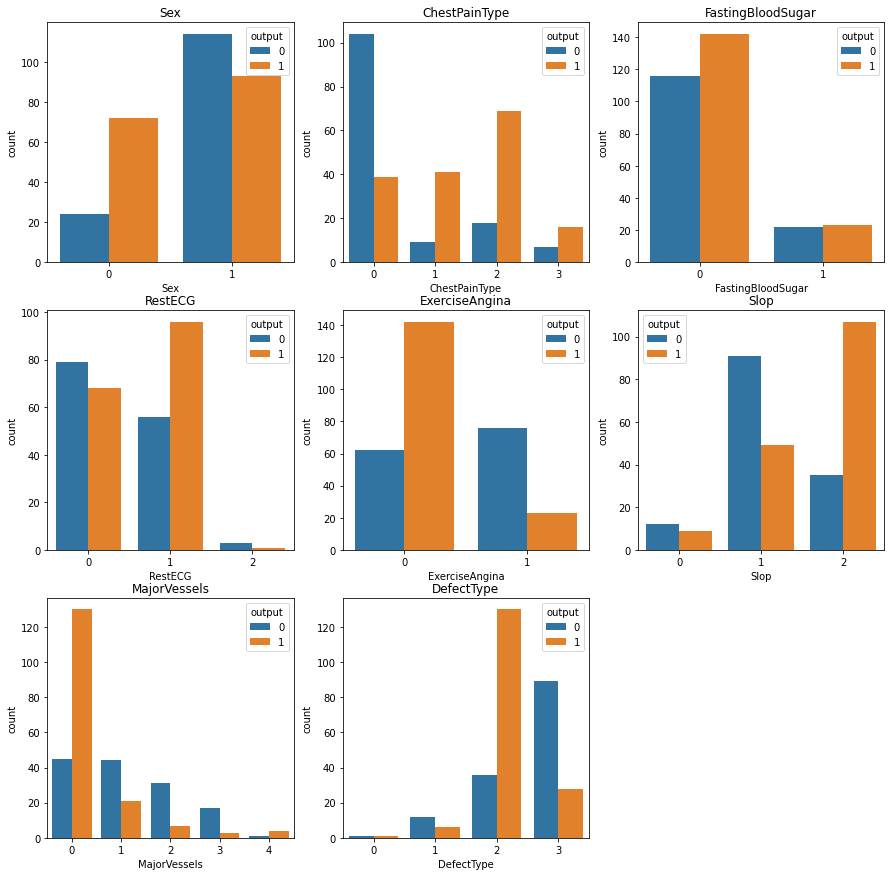

In [16]:
plt.figure(figsize=(15,15))
plt.tight_layout()
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    sns.countplot(x=df[i], hue=df.output)
    plt.title(i)
    counter+=1

For any feature, if a category has disproportionate hue results, means, say for DefectType category 2, the chances of heart attack is disproportionately high, so these kind of features are pretty determining of final results in my opinion.

This trend is present in -
ExerciseAngina category 0.
Slop category 2.
MajorVessel category 0.
DefectType category 2.
Sex category 0.
ChestPainType category 1,2,3.

So we must get the numbers.

In [17]:
def percent_cat(df, feature_name):
    
    unique_values = df[feature_name].unique()
    no_of_unique_values = len(unique_values)
    
    my_dict = {}
    l_pos = []
    l_neg = []
    
    for i in unique_values:
        total = len(df[df[feature_name]==i].output)
        positive = sum(list(df[df[feature_name]==i].output == 1))
        negative = sum(list(df[df[feature_name]==i].output == 0))
        perc_pos = int(positive*100/total)
        perc_neg = int(negative*100/total)
        
        l_pos.append(perc_pos)
        l_neg.append(perc_neg)
    plt.suptitle('No of datapoints: '+str(len(df)))
    plt.bar(unique_values, l_pos, label='Positive', color='Blue')
    plt.bar(unique_values, l_neg, label='Negative', color='Orange')
    plt.xlabel('Category No')
    plt.ylabel('Percent')
    plt.legend()
    plt.title(feature_name)

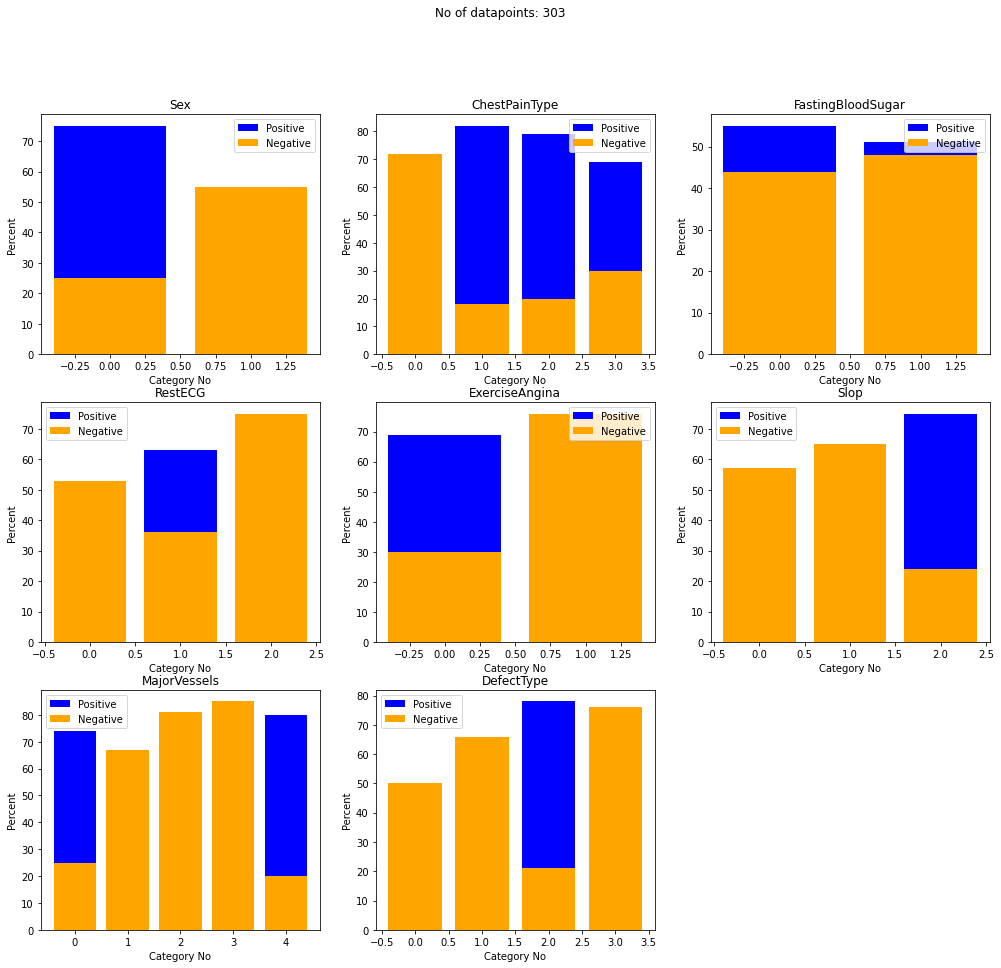

In [18]:
plt.figure(figsize=(17,15))
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    percent_cat(df,i)
    counter += 1
plt.show()

So, as we can see,

Sex category 0

ChestPainType 1,2,3

RestECG 1

ExerciseAngina 0

Slop 2

MajorVessels 0, 4

DefectType 2 Are major determining factors.

At the same time, for other categories, sometimes negative outweighs positives, that also gives them importance.

ChestPainType 0

RestECG 2

ExerciseAngina 1

Slop 0, 1

MajorVessel 1,2,3

DefectType 1,3

Let's look at the data only for women as they have higher chances of Heart Attack



Women

In [20]:
wdf = df[df.Sex==0]


In [21]:
wdf

,Age,Sex,ChestPainType,RestBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRate,ExerciseAngina,STDepbyExercise,Slop,MajorVessels,DefectType,output
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [22]:
len(wdf)

96

We have only 96 data points for women



Lets plot the Numerical and Categorical columns only for women



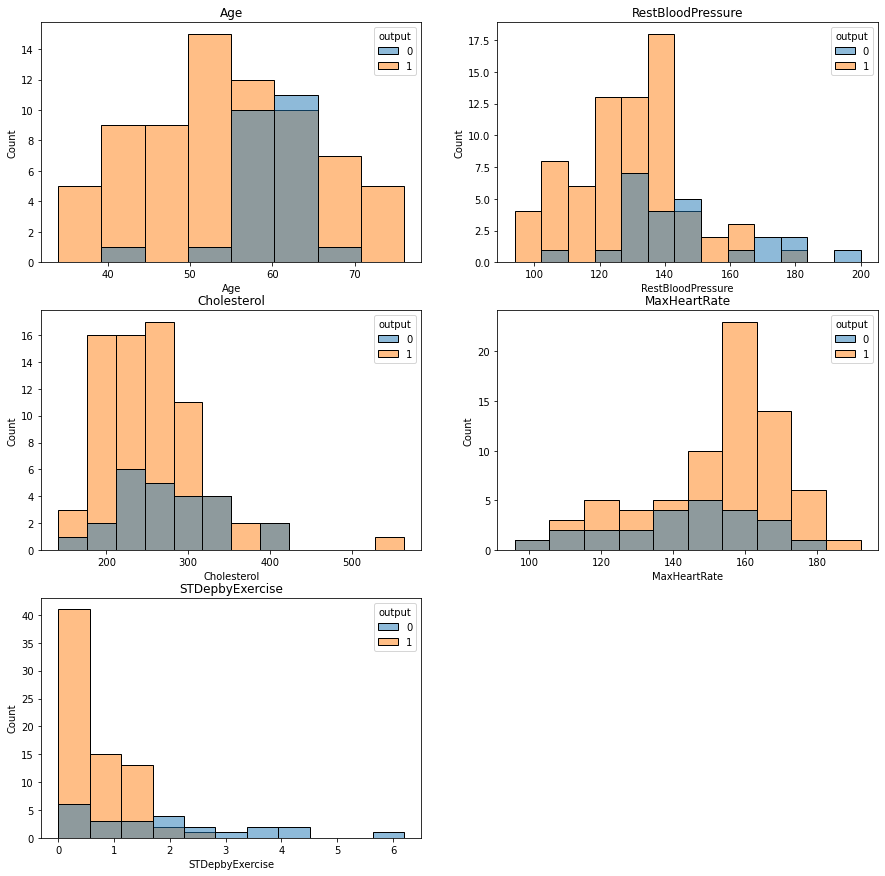

In [23]:
rows, cols = 3, 2
plt.figure(figsize=(15,15))
plt.tight_layout()
counter = 1
for i in numerical_columns:
    if counter<=9:
        plt.subplot(rows, cols, counter)
        sns.histplot(data = wdf, x= i, hue='output')
        plt.title(i)
        counter+=1


Who has higher risk?


Those with rest blood pressure less than 140

with max heart rate above 140

STDepbyExercise less than 2

Normal cholesterol level is below 200 and our data starts at 200 so almost everyone in survey is at risk.

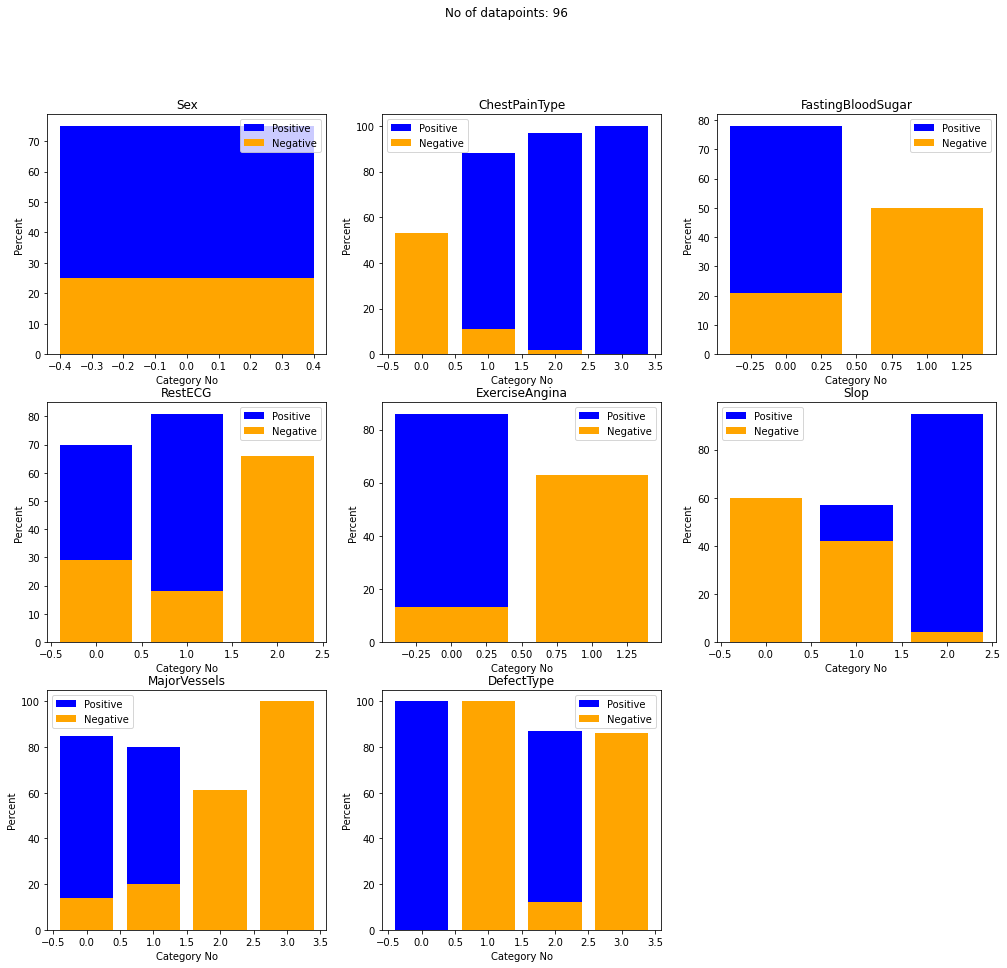

In [24]:
plt.figure(figsize=(17,15))
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    percent_cat(wdf,i)
    counter += 1
plt.show()

A couple things to notice here:
    

ChestPainType 3 is 100% Positive

DefectType 0 is 100% Positive

MajorVessels 3 is 100% Negative

DefectType 1 is 100% Negative



Any woman with ChestPainType 1,2,3 is having very high chances of heart attack.
So is true with FastingBloodSugar 0

Now we will check variations in data by age groups for women.



Age Group: Less than 40



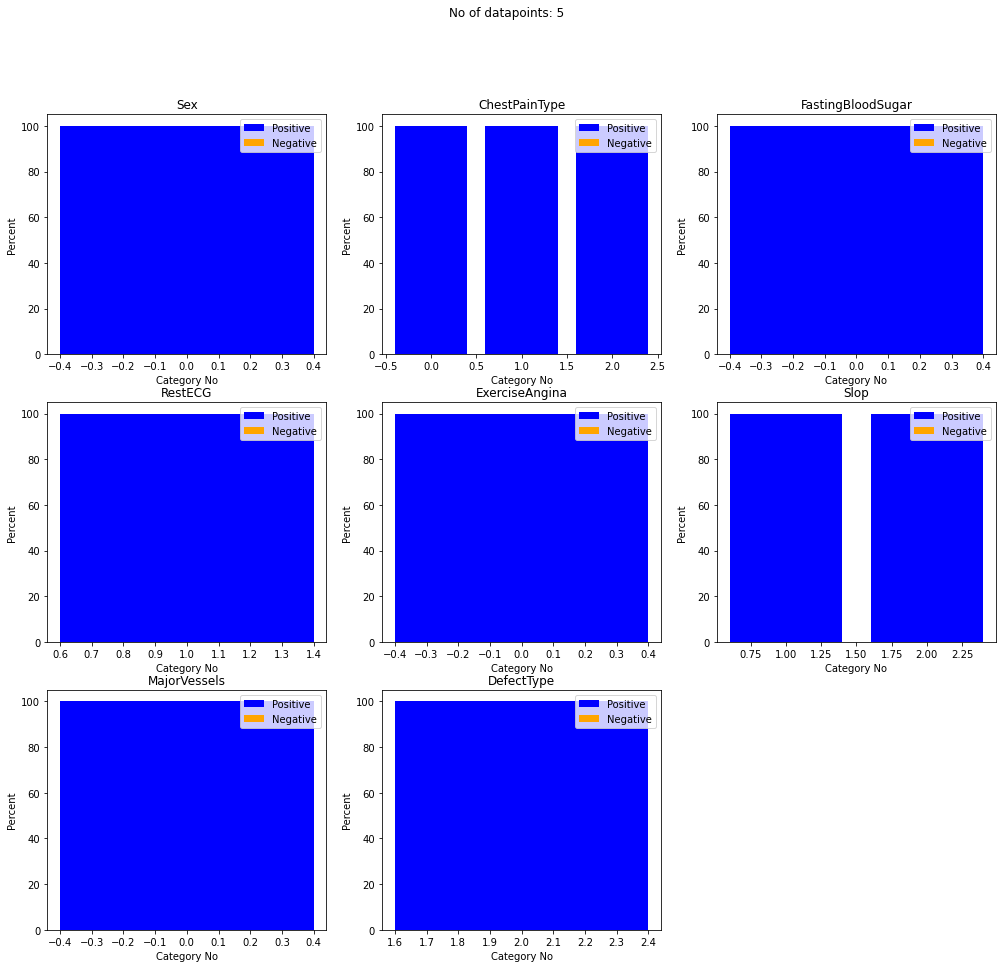

In [27]:
plt.figure(figsize=(17,15))
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    percent_cat(wdf[(wdf.Age<40)],i)
    counter += 1
plt.show()

There is very less data for this age group



Age Group: 40 to 50



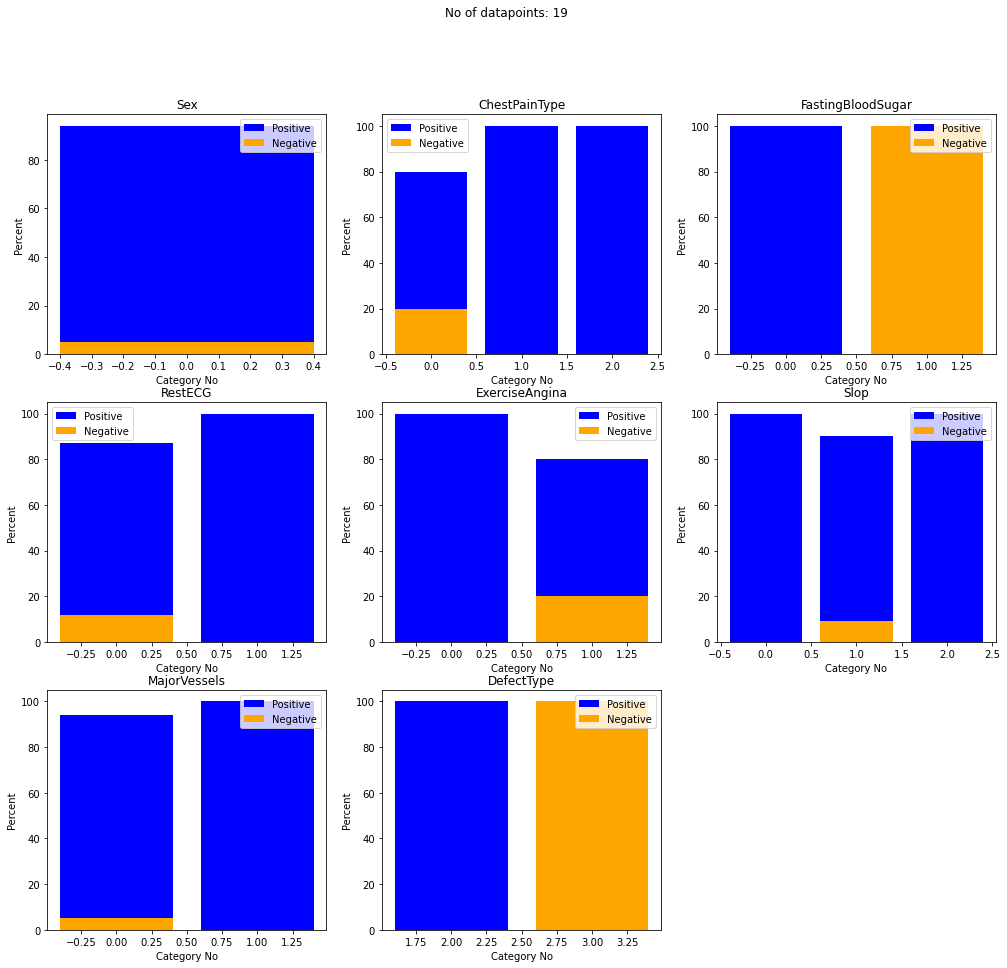

In [28]:
plt.figure(figsize=(17,15))
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    percent_cat(wdf[(wdf.Age>40) & (wdf.Age<50)],i)
    counter += 1
plt.show()

This dataset has almost everyone as positive in this age group.



Age group 50 to 60



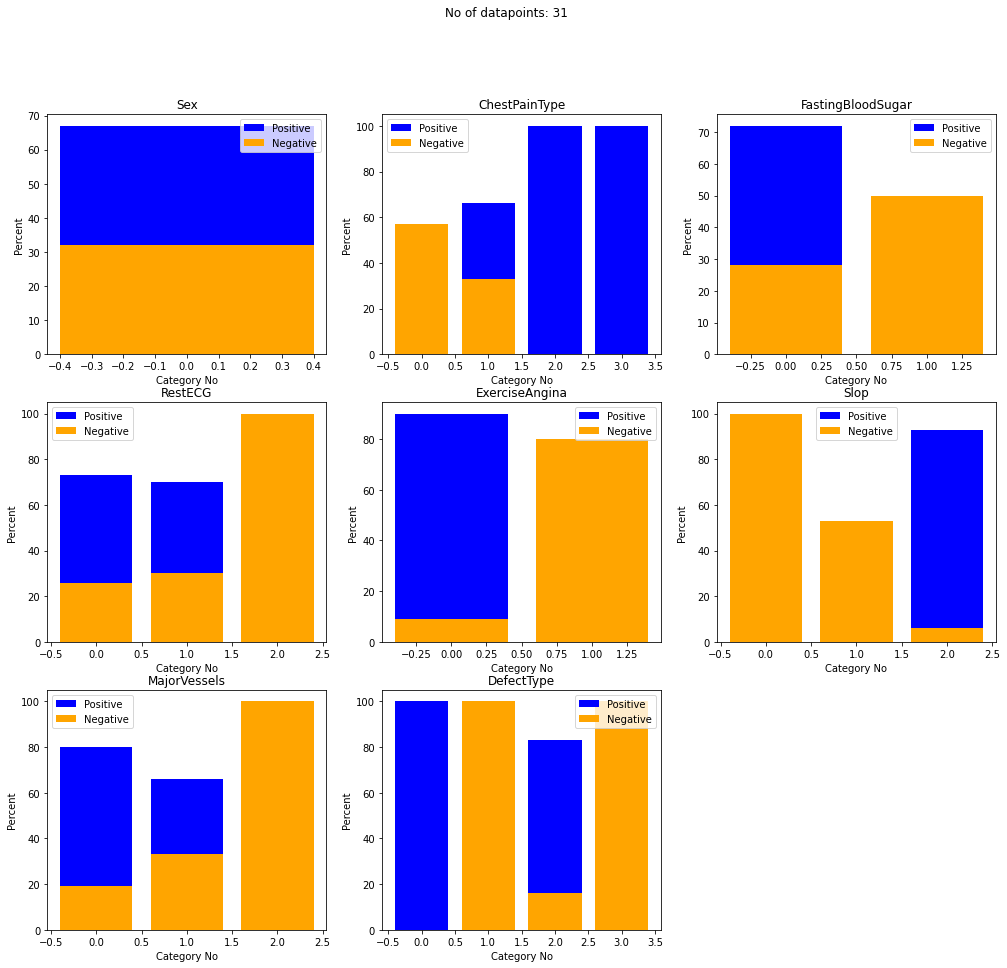

In [29]:
plt.figure(figsize=(17,15))
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    percent_cat(wdf[(wdf.Age>50) & (wdf.Age<60)],i)
    counter += 1
plt.show()


In this age group around 70 percent people are positive.



Age Group 60 to 70



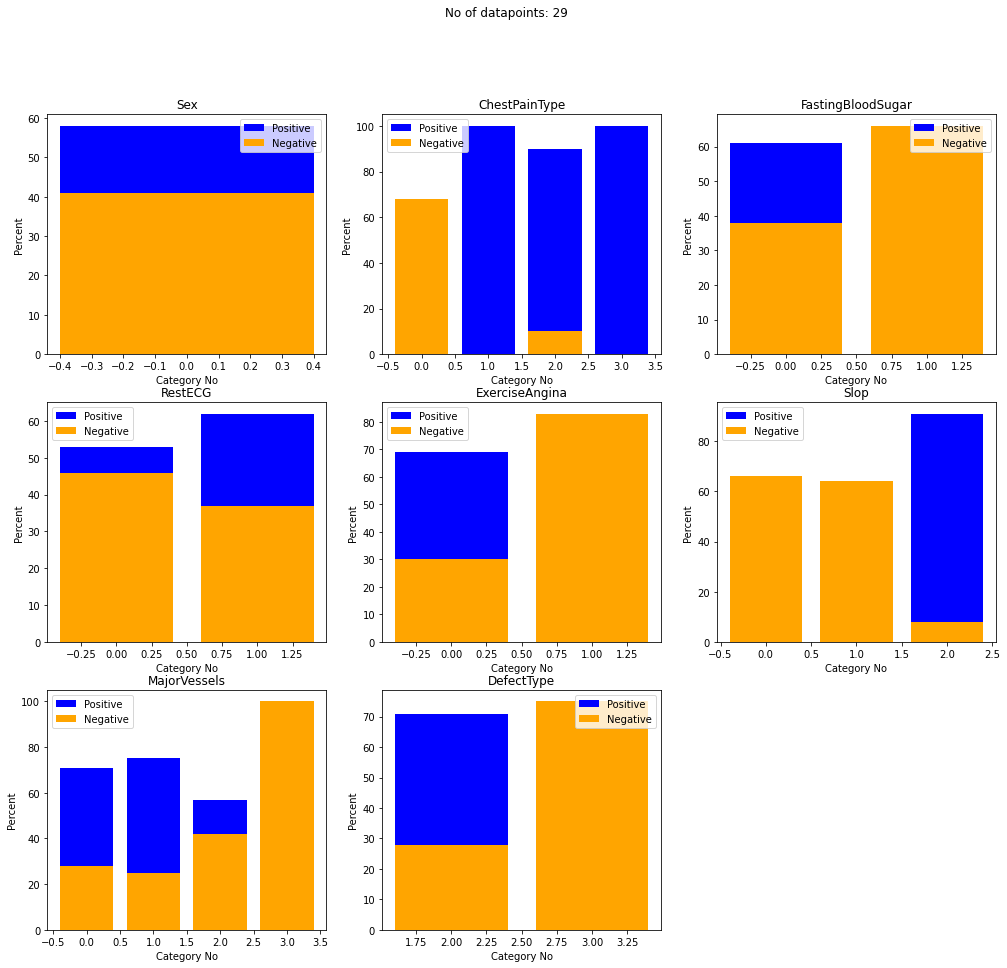

In [30]:
plt.figure(figsize=(17,15))
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    percent_cat(wdf[(wdf.Age>60) & (wdf.Age<70)],i)
    counter += 1
plt.show()

Chest pain type 1,2,3 are major indicators.



Men

In [31]:
mdf = df[df.Sex==1]


Lets plot the Numerical and Categorical columns only for Men



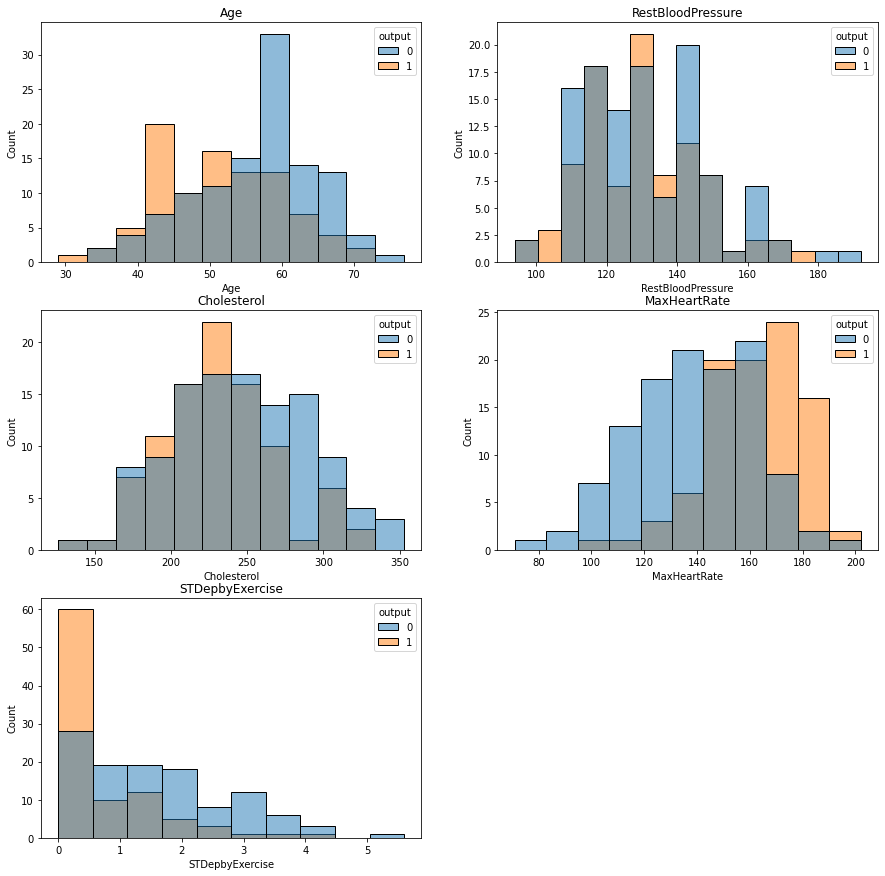

In [32]:
rows, cols = 3, 2
plt.figure(figsize=(15,15))
plt.tight_layout()
counter = 1
for i in numerical_columns:
    if counter<=9:
        plt.subplot(rows, cols, counter)
        sns.histplot(data = mdf, x= i, hue='output')
        plt.title(i)
        counter+=1

Highly overlapping distributions for numerical features, not easily separable.



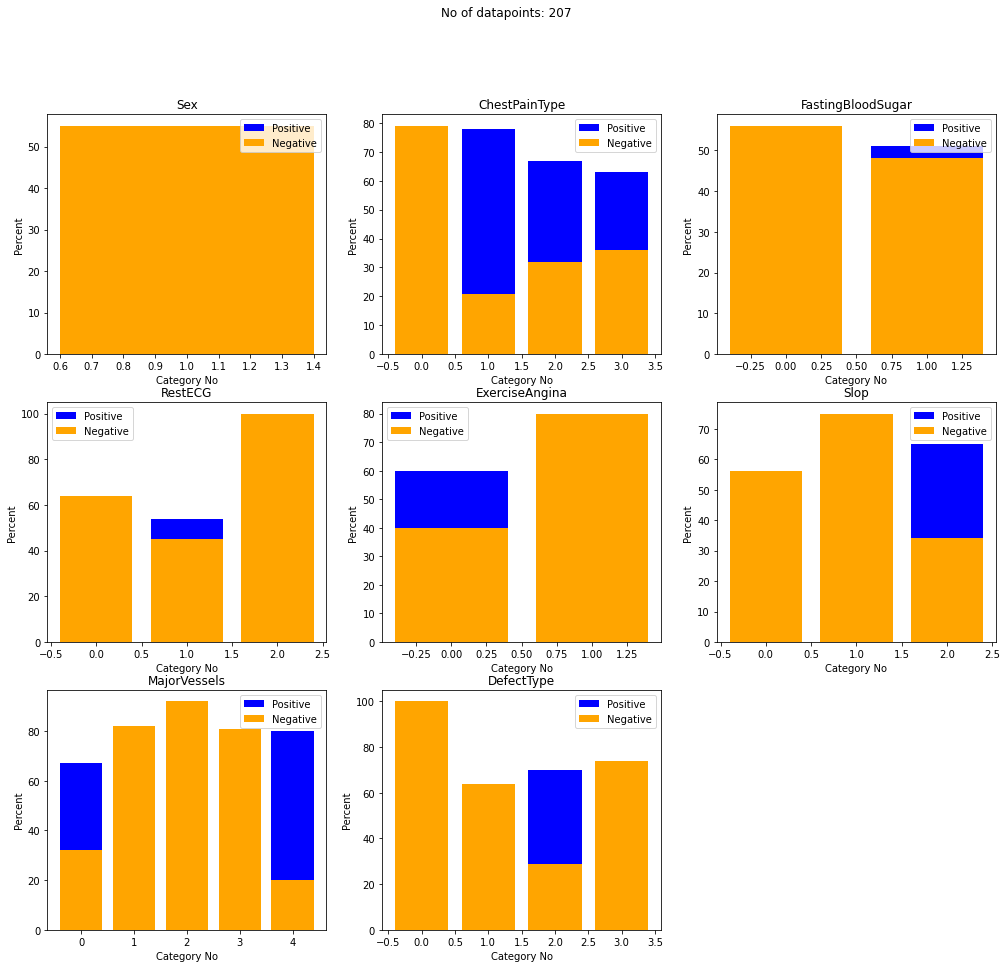

In [33]:
plt.figure(figsize=(17,15))
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    percent_cat(mdf,i)
    counter += 1
plt.show()

A couple things to notice here:

ChestPainType 3 is 100% Positive

DefectType 0 is 100% Positive

MajorVessels 3 is 100% Negative

DefectType 1 is 100% Negative

Any man with ChestPainType 1,2,3 is having very high chances of heart attack.
So is true with FastingBloodSugar 0




Again let's look at the data by age group




Age Group: less than 40



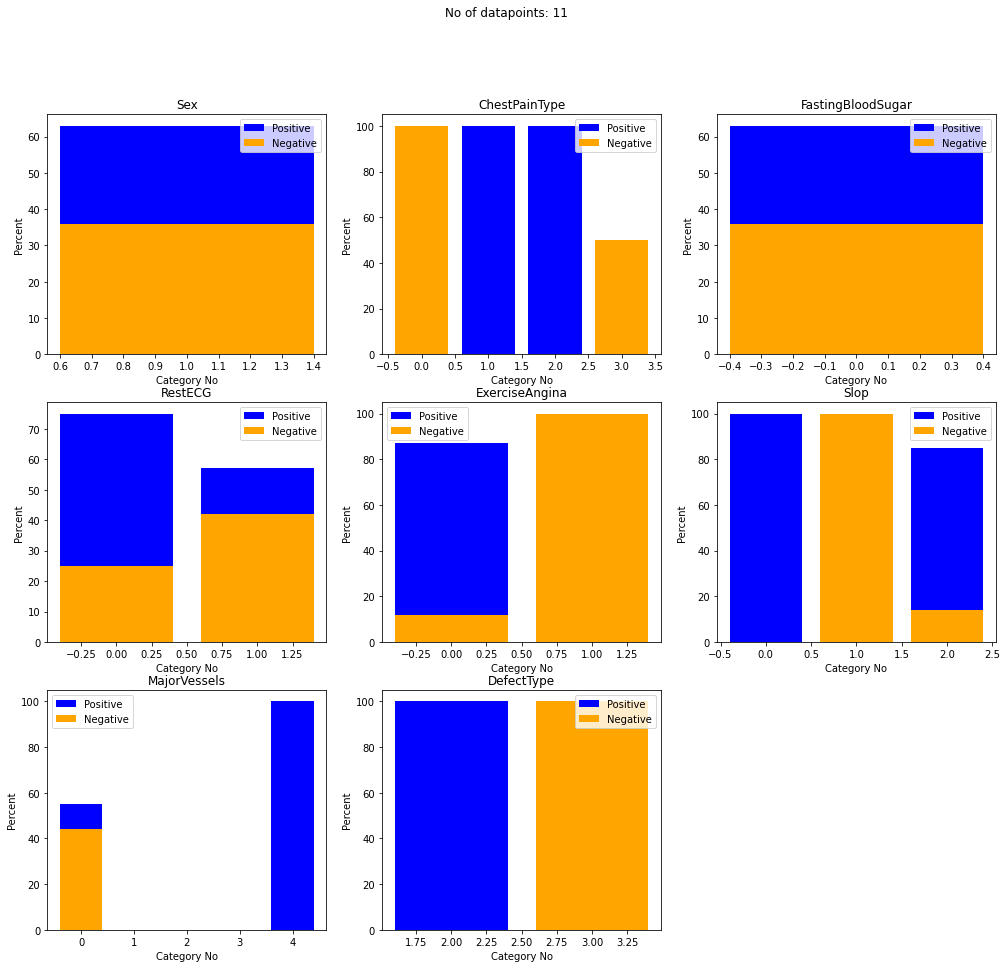

In [34]:
plt.figure(figsize=(17,15))
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    percent_cat(mdf[(mdf.Age<40)],i)
    counter += 1
plt.show()


Age Group: 40 to 50



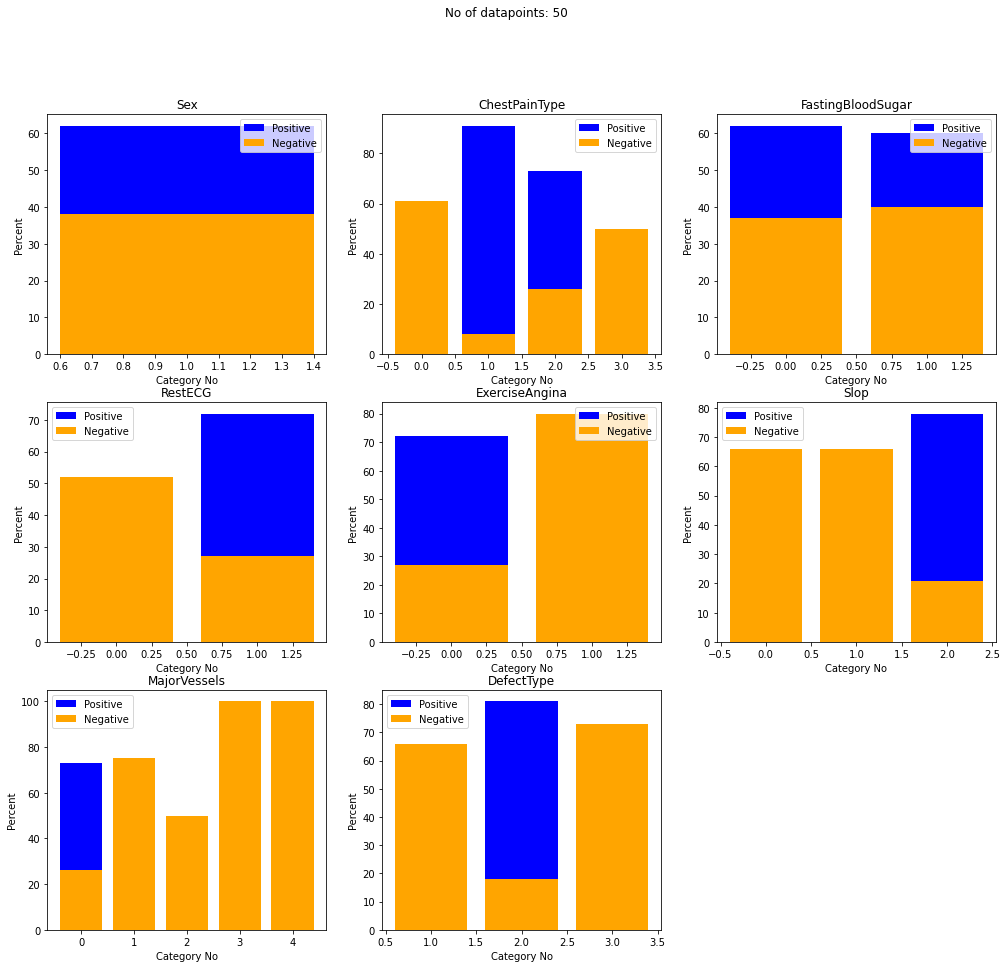

In [35]:
plt.figure(figsize=(17,15))
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    percent_cat(mdf[(mdf.Age>40) & (mdf.Age<50)],i)
    counter += 1
plt.show()

Chest pain type 1, 2 are good indicators



Age Group: 50 to 60



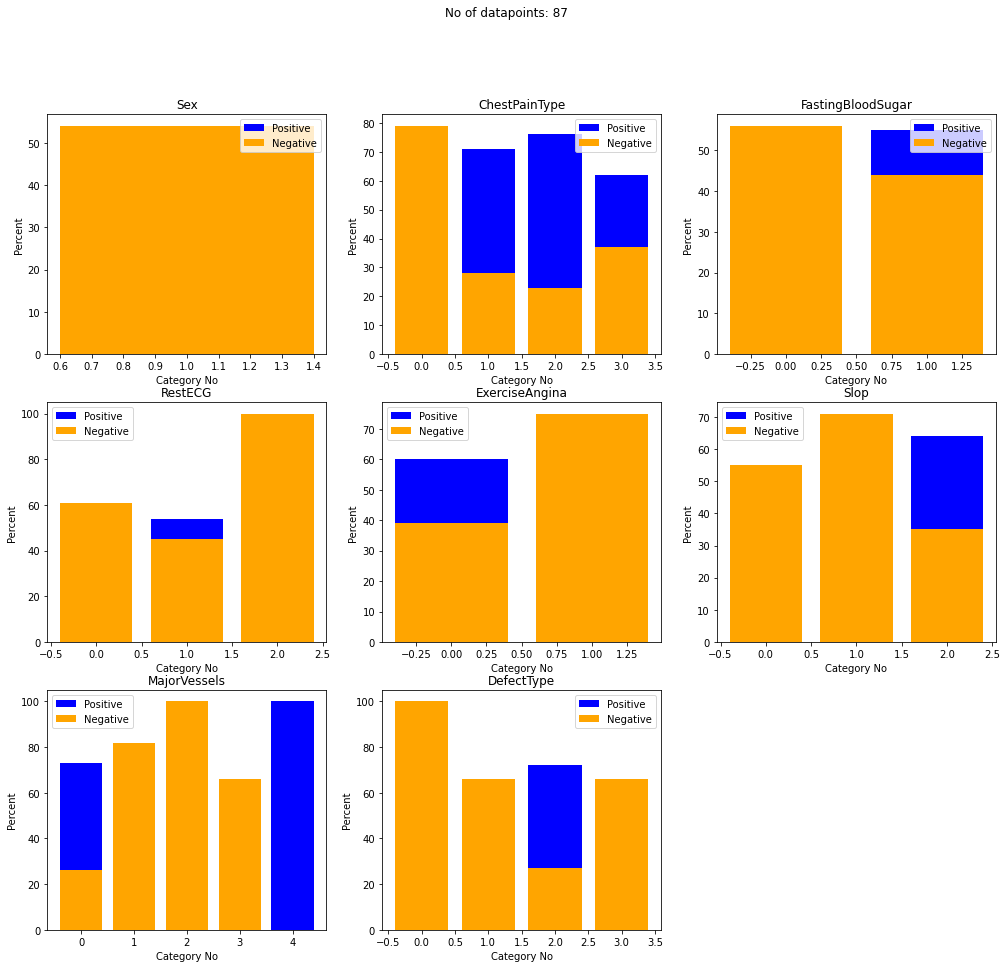

In [36]:
plt.figure(figsize=(17,15))
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    percent_cat(mdf[(mdf.Age>50) & (mdf.Age<60)],i)
    counter += 1
plt.show()


Around 50 50 break of positive and negative and 80+ data points are good.



Some features have 100% negative and some have 100% positive for certain categories. Which make them strong indicators.

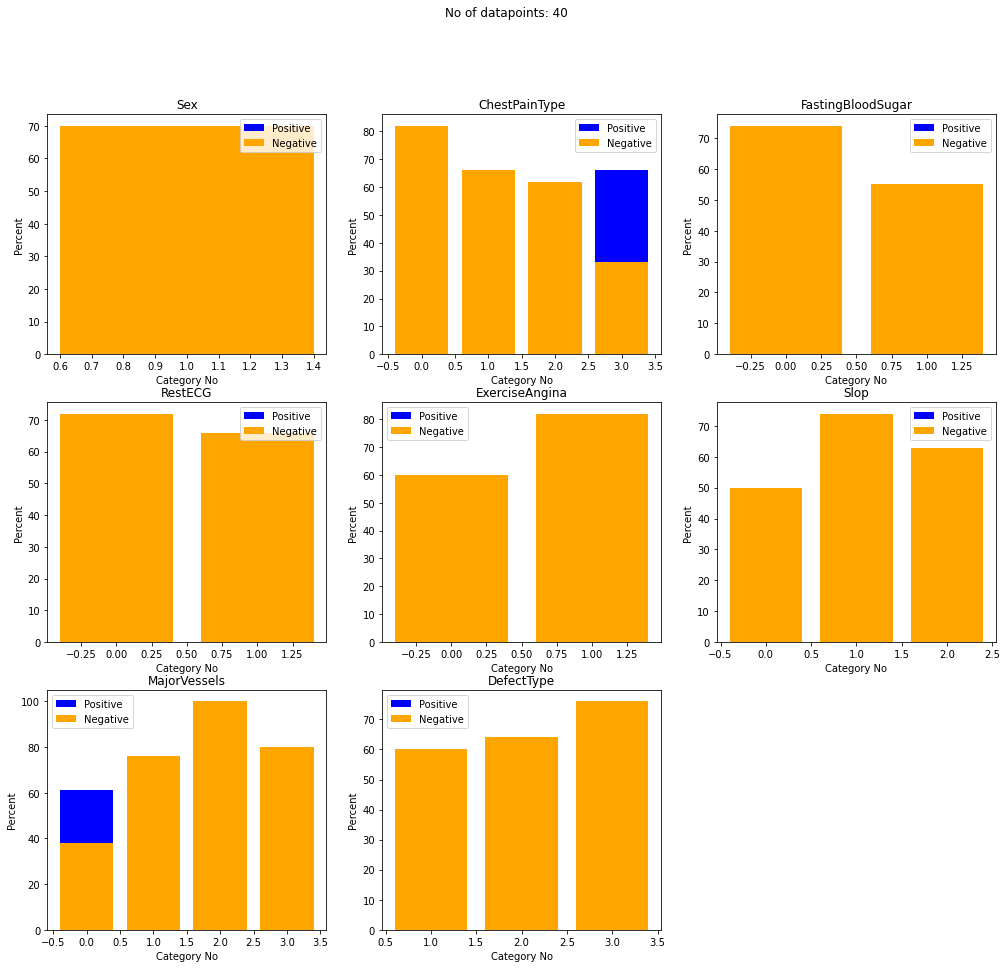

In [37]:
plt.figure(figsize=(17,15))
counter = 1
for i in categorical_columns:
    plt.subplot(3,3,counter)
    percent_cat(mdf[(mdf.Age>60) & (mdf.Age<70)],i)
    counter += 1
plt.show()